<a href="https://colab.research.google.com/github/Marino28/Machine-Learning/blob/main/APAP_Evaluaci%C3%B3n_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h2><font color="#004D7F" size=4>Módulo 4</font></h2>



<h1><font color="#004D7F" size=5>Evaluación conocimientos</font></h1>

<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Asociación Popular de Ahorro y Préstamos - APAP</font><br>
<font color="#004D7F" size=3>Prevención y Contro de Fraude
</font><br>
<font color="#004D7F" size=3>Septiembre 2023</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Preparando los datos](#section2)
   * [Análisis de datos](#section21)
   * [Preprocesamiento](#section22)
* [3. Fase de modelado](#section3)
   * [Gradiente descendiente estocástico (SGD)](#section33)
   * [Regresión logística](#section31)
   * [Support Vector Machine (SVM)](#section32)
   * [Árboles de decision](#section34)
* [4. Conclusiones](#section5)



---

<a id="section1"></a>
## <font color="#004D7F"> 1. Introducción</font>

La presente evaluación tiene como finalidad medir el conocimiento de la herramienta y el proceso de construcción de modelos ya sea de clasificación o predictivos.

En esta evaluación se va a utilizar el dataset [Census Income Dataset](http://archive.ics.uci.edu/ml/datasets/Census+Income). Este dataset contiene datos como la edad, trabajo, estudios, etc. de más de 48K personas.

El objetivo consiste en predecir si dicha persona tiene unos ingresos que superan los 50K dólares anuales; para ello deberá guiarse a través de la metodología CRISP-DM para llevar a cabo el objetivo esperado.


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Preparando los datos</font>


Cargar el dataset indicado y las librerias necesarias para analizar los datos de entrada. Se solicita:

* ¿Que tipos de datos encontramos en el dataset?
* ¿La variable respuesta esta balanceada?



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---

<a id="section21"></a>
### <font color="#004D7F">Análisis de datos</font>

Realizar un análisis exploratorio de los datos. Responder a las siguientes preguntas (Justifique su respuesta):

* ¿Estan las muestras balanceadas?
* ¿De qué tipo son los datos? ¿Hay que transformarlos?
* ¿Hay valores perdidos? Lleve a cabo el tratamiento adecuado según su criterio para tratar con dichos valores. Justifique su respuesta

### Proceso de análisis


---



---


#### Descripcion de limpieza

**age**: Es un tipo de dato entero, y las edades se encuentran entre 17 y 80. No hay valores faltantes. No se realizaron cambios en esta columna.

**workclass**: Hay 7 valores únicos según la descripción. Los valores etiquetados como "Never-worked" y "Without-pay fueron reemplazados por "Unemployed".

**fnlwgt**: No hay valores faltantes. No se realizaron cambios en esta columna.

**education**: Hay 9 valores únicos en esta columna. Los valores etiquetados como " 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th" y " 12th" fueron reemplazados por "School" y los valores etiquetados como " Prof-school", " Assoc-voc", " Assoc-acdm", " Some-college", fueron reemplazados por " Post-Graduate".

**education-num**: Es un tipo de dato entero, no hay valores faltantes. No se realizaron cambios en esta columna.

**marital-status**: Hay 3 valores únicos en esta columna, Married, Not Married y Other. Se reemplazaron "Married-civ-spouse", " Married-spouse-absent" y " Married-AF-spouse" con "Married", "Never-married" con "Not Married" y " Separated", " Widowed", " Divorced" con "Other".

**occupation**: Hay 14 valores únicos en esta columna. Los valores nulos fueron reemplazados por la moda (Prof-specialty).

**relationship**: Hay 6 valores únicos sin valores faltantes según la descripción de los datos. No se realizaron cambios en esta columna.

**race**: Hay 4 valores únicos sin valores faltantes según la descripción de los datos. No se realizaron cambios en esta columna.

**sex**: Hay 2 valores únicos sin valores faltantes según la descripción de los datos. No se realizaron cambios en esta columna.

**capital-gain**: Es un tipo de dato entero, no hay valores faltantes. No se realizaron cambios en esta columna.


**capital-loss**:	Es un tipo de dato entero, no hay valores faltantes. No se realizaron cambios en esta columna.


**hours-per-week**:Es un tipo de dato entero, no hay valores faltantes. No se realizaron cambios en esta columna.

**native-country**: Hay 41 paises diferentes, los campos vacios fueron llenados con la moda (United States)

**income**: Hay 2 valores únicos sin valores faltantes según la descripción de los datos, estos fueron cambiados a 0 (<50K) y 1 (>=50K).

---

Solo el **24%** de las personas del dataset ganan mas de 50K, asi que la muestra fue **estratificada** en income.

In [ ]:
# Importar datos

adult_df = pd.read_csv("/content/adult.data", names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income' ])
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


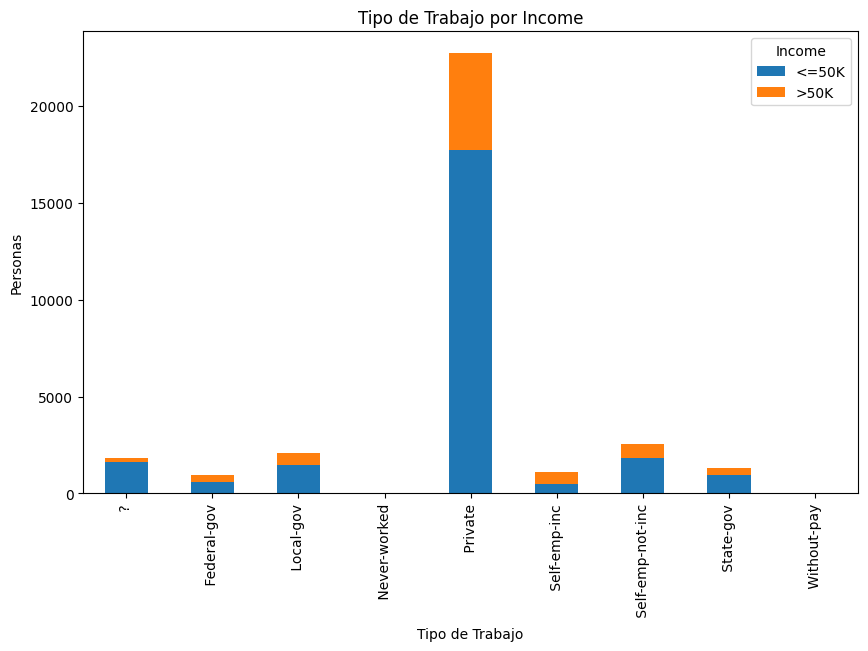

In [ ]:
# Agrupar los datos por 'workclass' i count de income con el fin de analizar si se deberia agrupar las clasificaciones
workclass_income_counts = adult_df.groupby(['workclass', 'income']).size().unstack()

# Plot the bar chart
ax = workclass_income_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tipo de Trabajo por Income')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Personas')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

In [ ]:
#Obtener una descripcion breve del dataset

adult_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Edad (age):**
La edad promedio de las personas en el conjunto de datos es aproximadamente 38.6 años, con una dispersión de alrededor de 13.6 años. La edad mínima es 17 años y la máxima es 90 años.

**Peso final (fnlwgt):**
El peso final promedio es de aproximadamente 189,778, con una dispersión de alrededor de 105,550. El peso final varía desde un mínimo de 12,285 hasta un máximo de 1,484,705.

**Años de educación (education-num):**
La duración promedio de la educación es de aproximadamente 10.08 años, con una dispersión de alrededor de 2.57 años. La duración de la educación varía desde un mínimo de 1 año hasta un máximo de 16 años.

**Ganancia de capital (capital-gain):**
La ganancia de capital promedio es de aproximadamente 1077.65, con una dispersión significativa de alrededor de 7385.29. La mayoría de las observaciones tienen ganancias de capital iguales a cero.

**Pérdida de capital (capital-loss):**
La pérdida de capital promedio es de aproximadamente 87.30, con una dispersión de alrededor de 402.96. La mayoría de las observaciones tienen pérdidas de capital iguales a cero.

**Horas por semana trabajadas (hours-per-week):**
La cantidad promedio de horas trabajadas por semana es de aproximadamente 40.44, con una dispersión de alrededor de 12.35 horas. La cantidad de horas trabajadas varía desde un mínimo de 1 hora hasta un máximo de 99 horas.

In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
adult_df.shape

(32561, 15)

<a id="section21"></a>
### <font color="#004D7F">Llenado de Valores Vacíos</font>

In [ ]:
adult_df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Reemplazar valores vacios por la moda
adult_df['workclass'] = adult_df['workclass'].replace(' ?',' Private')

# Agrupar personas que nunca han trabajado y personas sin paga como desempleado, ya que ninguno tiene ingresos
adult_df["workclass"] = adult_df["workclass"].replace([" Never-worked", " Without-pay"], " Unemployed")

In [ ]:
adult_df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
# Agrupar grados de Escuela y Titulos post High School

adult_df["education"] = adult_df["education"].replace([" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th"," 12th"], " School")
adult_df["education"] = adult_df["education"].replace([" Prof-school", " Assoc-voc", " Assoc-acdm", " Some-college"], " Post-Graduate")

In [ ]:
adult_df["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
# Agrupar en casados y no casados

adult_df["marital-status"] = adult_df["marital-status"].replace([" Married-civ-spouse", " Married-spouse-absent", " Married-AF-spouse"], " Married")
adult_df["marital-status"] = adult_df["marital-status"].replace(" Never-married", " Not Married")
adult_df["marital-status"] = adult_df["marital-status"].replace([" Separated", " Widowed", " Divorced"], " Other")

In [ ]:
adult_df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# Reemplazar valores vacion por la moda

adult_df['occupation'] = adult_df['occupation'].replace(' ?',' Prof-specialty')

In [ ]:
adult_df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
adult_df["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
adult_df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
adult_df["native-country"].value_counts()



 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
adult_df["native-country"].nunique()

42

In [ ]:
adult_df['native-country'] = adult_df['native-country'].replace(' ?',' United-States')

In [ ]:
adult_df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
# Reemplazar con valores numericos para poder realizar operaciones matematicas
adult_df['income'] = adult_df['income'].replace(' <=50K',0)
adult_df['income'] = adult_df['income'].replace(' >50K',1)

In [ ]:
# Crear una tabla cruzada entre income y workclass
grouped = adult_df.groupby('workclass')['income'].value_counts(normalize=True).unstack().reset_index()


# Display the resulting table
print(grouped)

income          workclass         0         1
0             Federal-gov  0.613542  0.386458
1               Local-gov  0.705208  0.294792
2                 Private  0.789907  0.210093
3            Self-emp-inc  0.442652  0.557348
4        Self-emp-not-inc  0.715073  0.284927
5               State-gov  0.728043  0.271957
6              Unemployed  1.000000       NaN


## Análisis descriptivo por visualizaciones

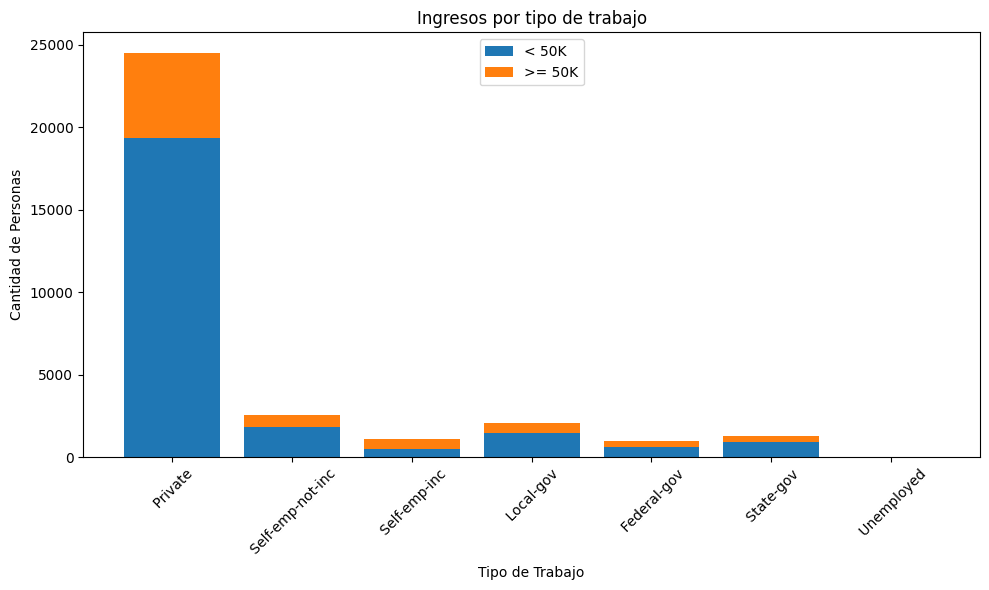

In [ ]:
grouped = adult_df.groupby('workclass')['income'].value_counts().unstack().reset_index()
grouped = grouped.sort_values(by=1, ascending=False)

# Agrupar por income la columna workclass como eje x, y la cantidad en el eje y.
x = grouped['workclass']
y0 = grouped[0]
y1 = grouped[1]

# Crear grafico de barras
plt.figure(figsize=(10, 6))
plt.bar(x, y0, label='< 50K')
plt.bar(x, y1, bottom=y0, label='>= 50K')

plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad de Personas')
plt.title('Ingresos por tipo de trabajo')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

"Private": La categoría tiene el mayor número de personas, con 19,378 ganando menos de 50,000 y 5,154 ganando 50,000 o más.El 21% de los individuos en esta categoría gana menos de 50,000.

"Self-emp-inc" tiene una proporción más alta de individuos que ganan $50,000 o más en comparación con "Self-emp-not-inc".

El trabajo en el gobierno, incluyendo "Local-gov," "Federal-gov," y "State-gov," muestra una distribución de ingresos más equilibrada.

Los datos presentan **desigualdad de ingresos** en diferentes categorías de trabajo. Mientras que algunas categorías tienen un número sustancial de individuos con ingresos elevados, otras tienen una proporción mayor de individuos con ingresos más bajos.

<ipython-input-25-88511704dc7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = adult_df.corr()


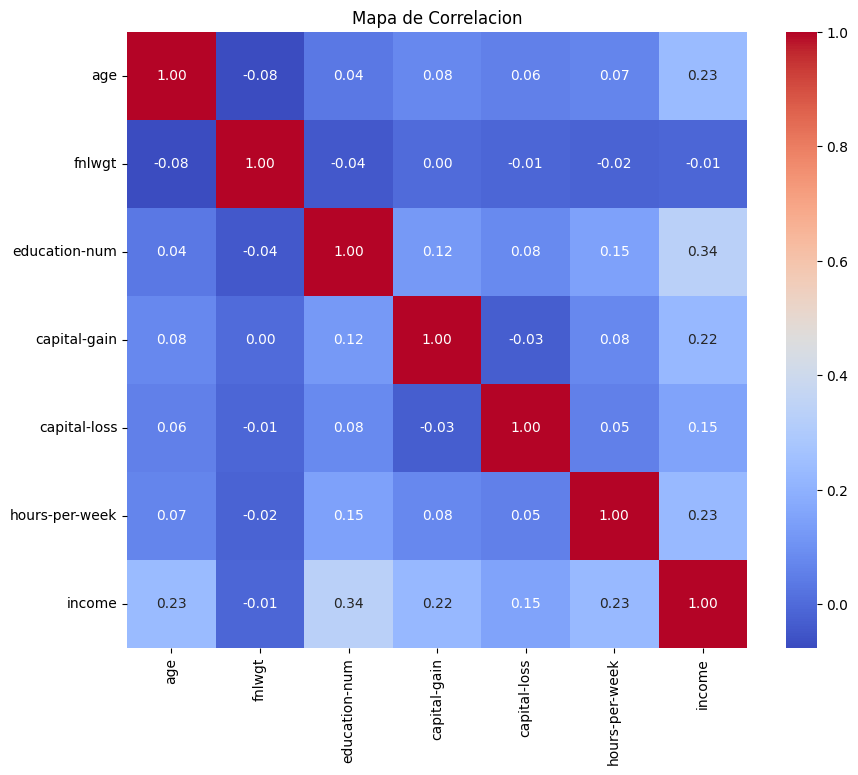

In [ ]:
# Calcular la correlacion entre valores
correlation_matrix = adult_df.corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlacion')
plt.show()

**No hay ninguna correlacion positiva alta que sea determinante para el análisis.**

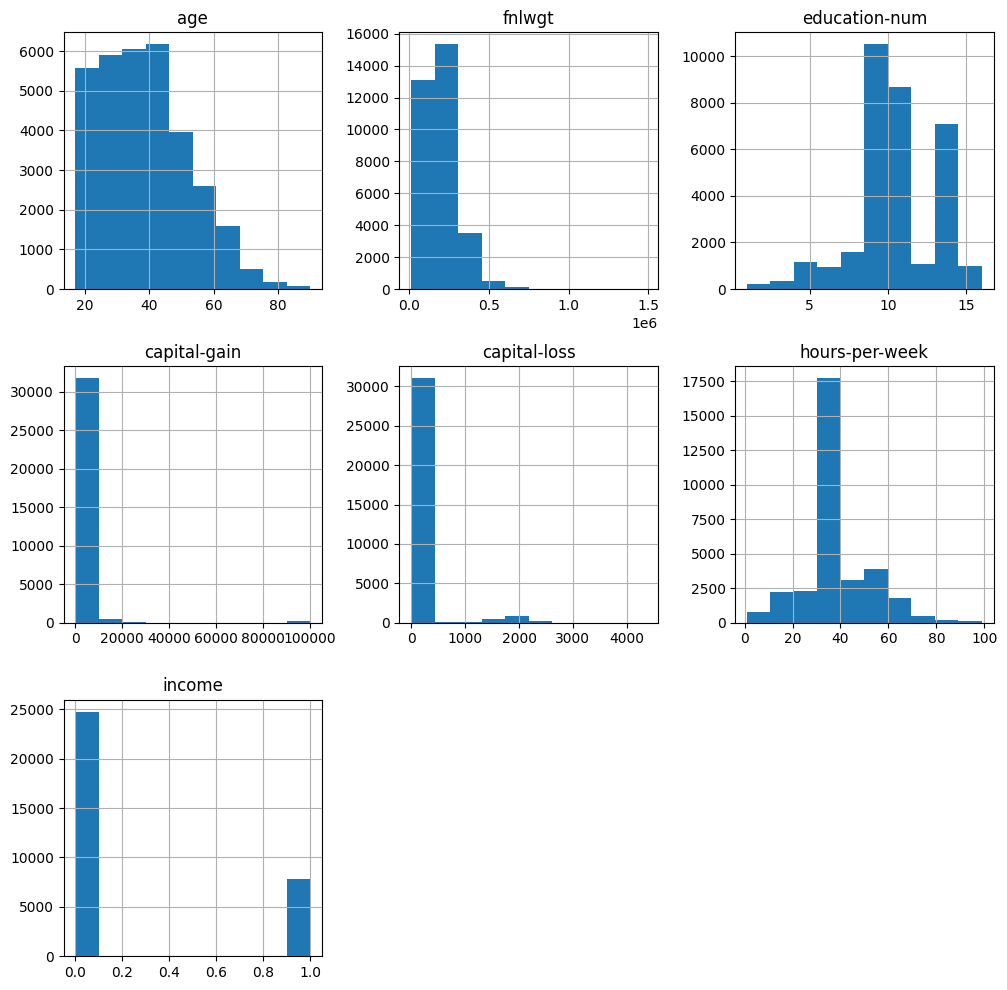

In [ ]:
adult_df.hist(figsize = (12,12), layout=(3,3), sharex = False)
plt.show()

Como describia la data anteriormente, las edades estan en un rango entre 17 y 90 años y la mayoria de estos se encuentran entre 20 y 60.

Las horas trabajadas por semana de las personas se encuentran en promedio entre 30 y 40 horas, pocas personas trabajan mas de 60 horas por semana.

Sólo el 24% de las personas en este dataset gana mas de 50K.

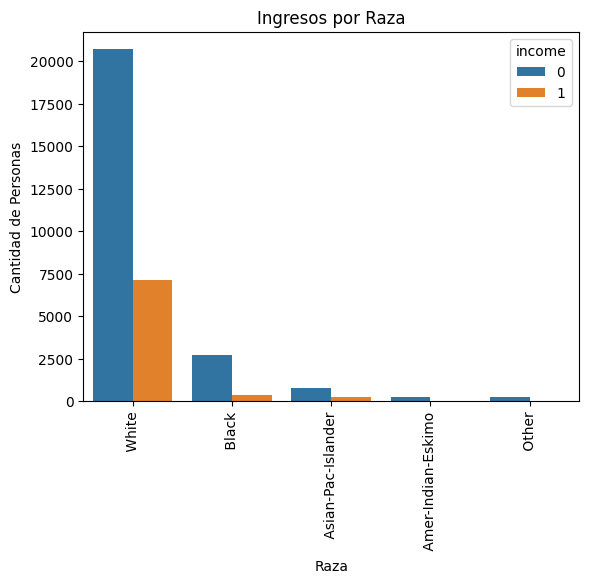

In [ ]:
sns.countplot(data = adult_df, x = adult_df["race"], hue = "income")
plt.xlabel('Raza')
plt.ylabel('Cantidad de Personas')
plt.title('Ingresos por Raza')
plt.xticks(rotation=90)
plt.show()


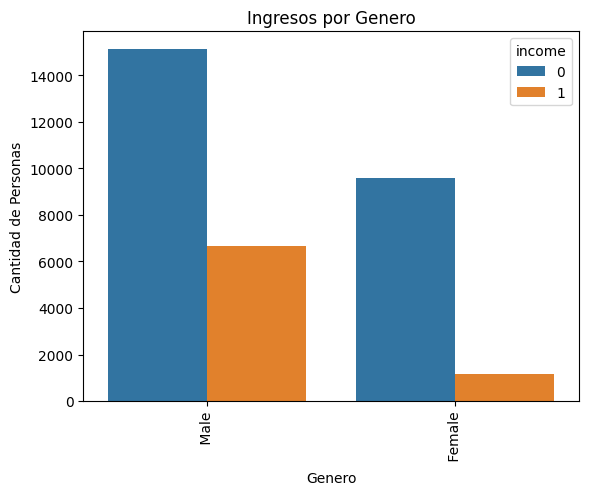

In [ ]:
sns.countplot(data = adult_df, x = adult_df["sex"], hue = "income")
plt.xlabel('Genero')
plt.ylabel('Cantidad de Personas')
plt.title('Ingresos por Genero')
plt.xticks(rotation=90)
plt.show()


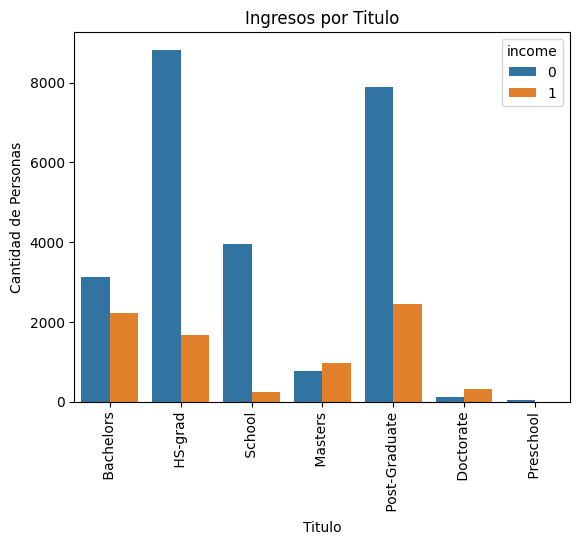

In [ ]:
sns.countplot(data = adult_df, x = adult_df["education"], hue = "income")
plt.xlabel('Titulo')
plt.ylabel('Cantidad de Personas')
plt.title('Ingresos por Titulo')
plt.xticks(rotation=90)
plt.show()

## Encontrar Outliers o Valores atípicos

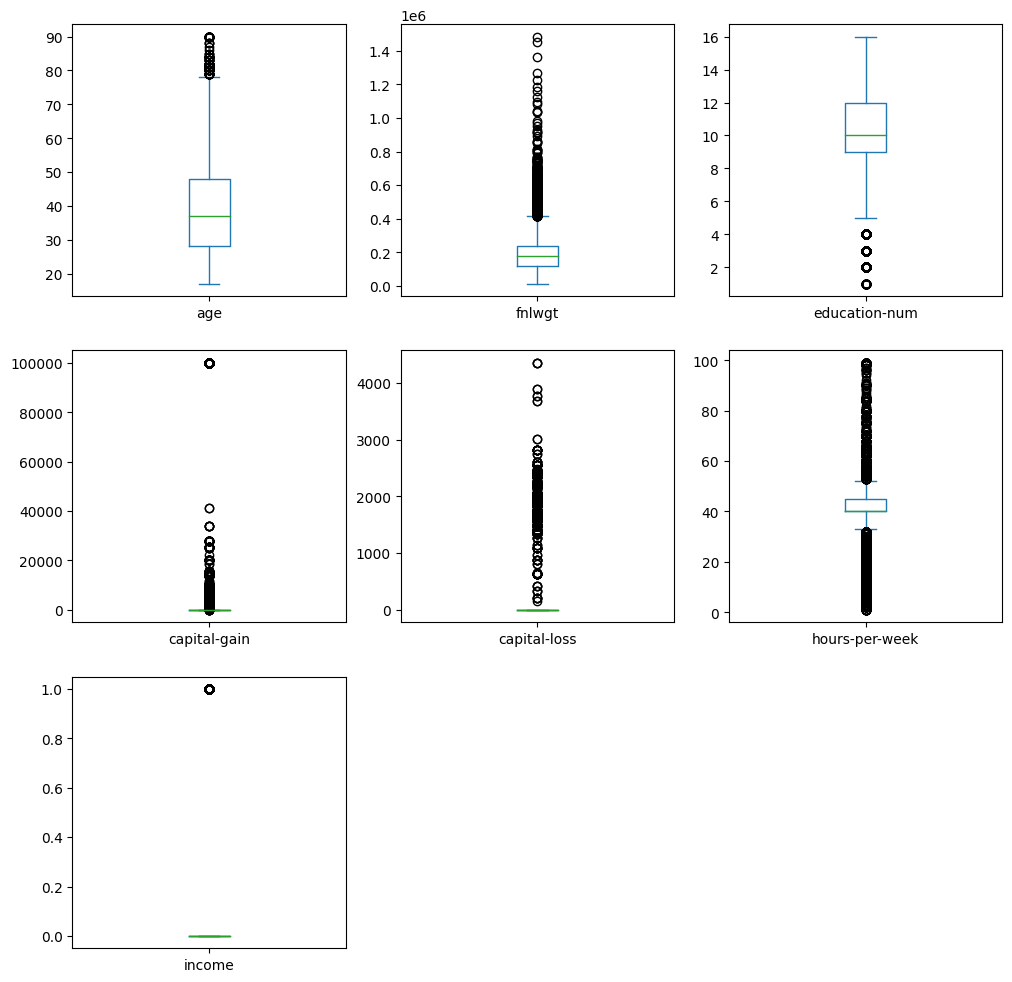

In [ ]:
adult_df.plot(kind = "box", figsize = (12,12), layout=(3,3), sharex = False, subplots = True)
plt.show()

<Figure size 1000x500 with 0 Axes>

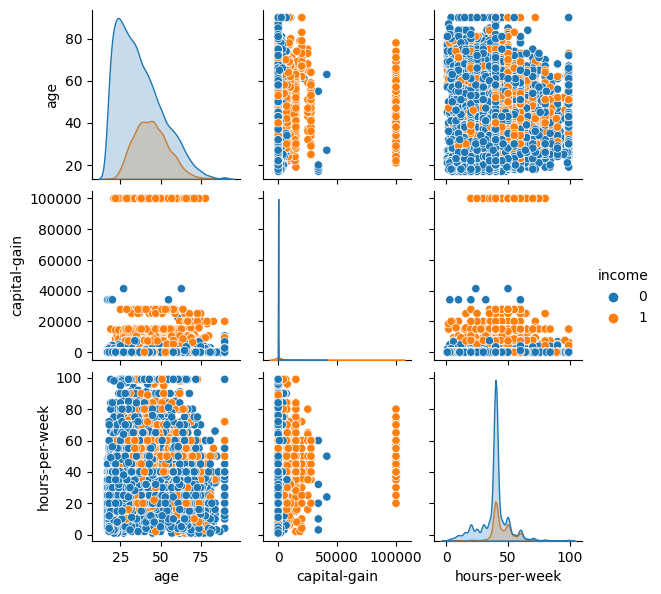

In [ ]:
selected_columns = ['age', 'capital-gain', 'hours-per-week']
selected_df = adult_df[selected_columns + ['income']]  # Include 'income' for hue

fig = plt.figure(figsize=(10, 5))
sns.pairplot(selected_df, hue='income', height=2)
plt.show()

---

<a id="section22"></a>
### <font color="#004D7F">Preprocesamiento</font>

Antes de realizar las transformaciones necesarias tenemos que realizar la partición entre muestras de train y test. LLeve a cabo dicha partición.

In [ ]:
X= adult_df.drop('income', axis = 1)
Y = adult_df['income']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


In [ ]:
numerical = ['age', 'capital-gain', 'hours-per-week', 'fnlwgt']

# Check if all columns in the list exist in the DataFrame
missing_columns = set(numerical) - set(adult_df.columns)
if missing_columns:
    print(f"Error: Columns {missing_columns} not found in the DataFrame.")
else:
    # Select the numerical columns
    X = adult_df[numerical]
    print(X.head())

   age  capital-gain  hours-per-week  fnlwgt
0   39          2174              40   77516
1   50             0              13   83311
2   38             0              40  215646
3   53             0              40  234721
4   28             0              40  338409


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
test_df = adult_df

label_binarizer = LabelBinarizer()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in categorical_columns:
    if column in test_df.columns:
        test_df[column] = label_binarizer.fit_transform(test_df[column])

test_df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,1,13,0,1,0,0,1,2174,0,40,0,0
1,50,0,83311,1,13,1,0,1,0,1,0,0,13,0,0
2,38,0,215646,0,9,0,0,0,0,1,0,0,40,0,0
3,53,0,234721,0,7,1,0,1,0,1,0,0,40,0,0
4,28,0,338409,1,13,1,0,0,0,0,0,0,40,0,0


In [ ]:
std_sca = StandardScaler().fit(adult_df.drop('income', axis = 1))

In [ ]:
X= std_sca.transform(adult_df.drop('income', axis = 1))
Y = adult_df['income']

---

<a id="section3"></a>
## <font color="#004D7F"> 3. Fase de modelado</font>

En SciKit hay multitud de modelos de aprendizaje supervisado ya implementados (https://scikit-learn.org/stable/supervised_learning.html) Algunos de estos modelos son:

1. [Regresión logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [$k$-vecinos más cercanos ($k$-NN)](https://scikit-learn.org/stable/modules/neighbors.html)
1. [Árboles de decisión](https://scikit-learn.org/stable/modules/tree.html)
1. [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/svm.html)
1. [Perceptrón multicapa](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

Algunos de estos modelos son muy sensibles a ciertos aspectos del preprocesamiento de los datos, por ejemplo, al escalado/normalización de las variables, a la codificación de variables categóricas o a la secuencialidad de los datos de entrada. Por lo que es conveniente tener en cuenta estos aspectos en todas las desiciones del proceso, desde el preprocesamiento de los datos a la selección modelos e hiperparámetros. **En la documentación de SciKit para cada uno de los modelos podemos encontrar instrucciones que nos indican/recuerdan estas cuestiones.**

Encontrar el mejor modelo que nos dé el mejor rendimiento con el mejor proceso establecido en los pasos anteriores (Utilize por lo menos 3 técnicas)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_Classifier = RandomForestClassifier()

model = rf_Classifier.fit(X_train, Y_train)

prediction = model.predict(X_test)


In [ ]:
print("Precisión en la data de entrenamiento: ",round(100 * rf_Classifier.score(X_train, Y_train),2), "%")
print("Precisión en la data de prueba: ",round(100 * rf_Classifier.score(X_test, Y_test), 2),"%")

Precisión en la data de entrenamiento:  99.93 %
Precisión en la data de prueba:  84.26 %


## Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_Classifier = LogisticRegression()

model = lr_Classifier.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [ ]:
print("Precisión en la data de entrenamiento: ",round(100 * lr_Classifier.score(X_train, Y_train),2), "%")
print("Precisión en la data de prueba: ",round(100 * lr_Classifier.score(X_test, Y_test), 2),"%")

Precisión en la data de entrenamiento:  83.91 %
Precisión en la data de prueba:  84.63 %


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=2)

# Fit the model to the training data
dt_model = dt_classifier.fit(X_train, Y_train)

# Make predictions on the test data
dt_prediction = dt_model.predict(X_test)

# Make predictions on the test data
dt_prediction_train = dt_model.predict(X_train)

# Evaluate the accuracy
accuracy = accuracy_score(Y_train, dt_prediction_train)
print(f"Decision Tree Train Accuracy: {round(100 * accuracy,2)} %")

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, dt_prediction)
print(f"Decision Tree Test Accuracy: {round(100 * accuracy,2)} %")

Decision Tree Train Accuracy: 99.93 %
Decision Tree Test Accuracy: 80.82 %


In [ ]:
X_train

array([[-0.48251753, -0.17429511,  0.06218603, ..., -0.21665953,
        -0.03542945, -0.02416321],
       [ 1.6435474 , -0.17429511,  0.40767696, ..., -0.21665953,
        -1.3312657 , -0.02416321],
       [-0.04264203, -0.17429511,  0.14888563, ..., -0.21665953,
         1.58436587, -0.02416321],
       ...,
       [-0.48251753, -0.17429511,  1.34308707, ..., -0.21665953,
         0.77446821, -0.02416321],
       [ 1.27698448, -0.17429511, -1.29632872, ...,  3.92525214,
        -0.19740898, -0.02416321],
       [-0.26257978, -0.17429511, -0.1233782 , ..., -0.21665953,
        -0.03542945, -0.02416321]])

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_Classifier = AdaBoostClassifier(random_state=200)

# Fit the model to the training data
ab_model = ab_Classifier.fit(X_train, Y_train)

# Make predictions on the test data
ab_prediction = ab_model.predict(X_test)

# Make predictions on the test data
ab_prediction_train = ab_model.predict(X_train)

# Evaluate the accuracy
accuracy = accuracy_score(Y_train, ab_prediction_train)
print(f"Ada Boost Accuracy: {round(100 * accuracy,2)} %")

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, ab_prediction)
print(f"Ada Boost Accuracy: {round(100 * accuracy,2)} %")

Ada Boost Accuracy: 85.53 %
Ada Boost Accuracy: 85.52 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cf = confusion_matrix(Y_test, ab_prediction)
print(cf)

[[4653  255]
 [ 688  917]]


In [ ]:
cr = classification_report(Y_test, ab_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4908
           1       0.78      0.57      0.66      1605

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513



- Precisión: ¿Cuántos de los identificados como positivos realmente son positivos?
- Recall o Exhaustividad: ¿Cuántos de los positivos reales fueron identificados por el modelo?

In [ ]:
print('Precision =' , round((100 * cf[0][0]/(cf[0][0]+cf[0][1])),2), "%")
print('Recall =' , round((100 * cf[0][0]/(cf[0][0]+cf[1][1])),2), "%")

Precision = 94.8 %
Recall = 83.54 %


Una vez que hemos seleccionado los mejores parámetros utilizando unicamente el conjunto de entrenamiento, podemos evaluar con el conjunto de test.

## Resultados test

In [ ]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']
df = pd.read_csv("/content/adult.test", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [ ]:
df.drop(labels=0, axis=0, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Reemplazar valores vacios por la moda
df['workclass'] = df['workclass'].replace(' ?',' Private')

# Agrupar personas que nunca han trabajado y personas sin paga como desempleado, ya que ninguno tiene ingresos
df["workclass"] = df["workclass"].replace([" Never-worked", " Without-pay"], " Unemployed")

# Agrupar grados de Escuela y Titulos post High School

df["education"] = df["education"].replace([" 1st-4th", " 5th-6th", " 7th-8th", " 9th", " 10th", " 11th"," 12th"], " School")
df["education"] = df["education"].replace([" Prof-school", " Assoc-voc", " Assoc-acdm", " Some-college"], " Post-Graduate")

# Reemplazar valores vacion por la moda

df['occupation'] = df['occupation'].replace(' ?',' Prof-specialty')

# Reemplazar con valores numericos para poder realizar operaciones matematicas
df['income'] = df['income'].replace(' <=50K',0)
df['income'] = df['income'].replace(' >50K',1)


In [ ]:
# Agrupar en casados y no casados

df['marital-status'] = df['marital-status'].replace([" Married-civ-spouse", " Married-spouse-absent", " Married-AF-spouse"], " Married")
df['marital-status'] = df['marital-status'].replace(" Never-married", " Not Married")
df['marital-status'] = df['marital-status'].replace([" Separated", " Widowed", " Divorced"], " Other")

## Separación de valores de test para realizar evaluación

In [ ]:
test_target = df.income.replace({" <=50K.": 0, " >50K.": 1}) # target
test_data = df.drop(["income"], axis= 1)

In [ ]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

for column in categorical_columns:
    if column in test_data.columns:
        test_data[column] = label_binarizer.transform(test_data[column])

#std_sca = StandardScaler().fit(df.drop('income', axis = 1))

#test_df_scaled = std_sca.transform(test_data)

# Make predictions on the test data
#test_predictions = dt_model.predict(test_df_scaled)

# Evaluate the accuracy of the predictions
#test_accuracy = accuracy_score(test_target, test_predictions)
#print(f"Decision Tree Test Accuracy: {round(100 * test_accuracy,2)} %")


In [ ]:
# Scalling
numerical = ['age', 'capital-gain', 'hours-per-week', 'fnlwgt']
scaler = MinMaxScaler()
test_data[numerical] = scaler.fit_transform(test_data[numerical])

# Encoding
#test_data['income'] = df.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
test_data = pd.get_dummies(test_data)

from imblearn.over_sampling import RandomOverSampler

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(test_data, test_target)

In [ ]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9995174909529554 | test:  0.9121431443506232
F1-score: train:  0.9995175647023269 | test:  0.9178264247659443


<a id="section3"></a>
## <font color="#004D7F"> 4. Conclusiones</font>


Para concluir el proyecto, podemos afirmar que es posible determinar si una persona gana más de $50,000 al año con base en datos del censo, con una precisión razonable del ~91% en la etapa de prueba.

Sin embargo, hay características que son más relevantes que otras, como la edad, las horas trabajadas por semana y el nivel de educación; estas deberían considerarse más a fondo para aumentar la precisión de los modelos.

Además, es necesario realizar ajustes más especializados para mejorar la calidad de las predicciones. Por ejemplo, se pueden llevar a cabo investigaciones adicionales sobre la ingeniería y selección de características para comprender mejor el comportamiento del objetivo, y también enfocarse en la optimización de los hiperparámetros de los modelos para extraer todo su potencial.

---




---

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio (opcional)</font>

Nos podríamos haber planteado otras cuestiones tanto durante el preprocesamiento de los datos como en las fases posteriores de ajuste de parámetros y clasificación. Dejamos aquí algunas sugerencias para que pruebes e intentes mejorar la tasa de aciertos:

* Binarizar las variables numéricas. Por ejemplo, crear grupos de edad.
* Estudiar la relación entre variables. ¿Se puede suprimir/añadir alguna?

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i></font></div>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>